In [3]:
%gui qt5
from aicsimageio import AICSImage, imread
from matplotlib_scalebar import scalebar as sb
from ScanImageTiffReader import ScanImageTiffReader

import numpy as np
import napari
import matplotlib.pyplot as plt

In [4]:
# Offset correction
def returnOffsetCorr(movie):
    if np.min(movie)<0:
        movie = movie - np.min(movie)
    return movie


def returnChannels(image):
    ch1= np.zeros((int(image.shape[0]/2),image.shape[1],image.shape[2]))
    ch1_count=0
    ch2= np.zeros((int(image.shape[0]/2),image.shape[1],image.shape[2]))
    ch2_count=0

    for i in range(image.shape[0]):
        if i%2 == 0:
            ch1[ch1_count, :, :] = image[i, :, :]
            ch1_count+=1
        else:
            ch2[ch2_count, :, :] = image[i, :, :]
            ch2_count+=1
    
    return ch1, ch2

In [5]:
# Change output figure size
# ...needs to be in its own cell for some reason...

plt.rcParams['figure.figsize'] = [16, 10]

In [66]:
PATH = '../GluSnfr3_210224/GPI+mscarlet/'
FILE = 'stack.tif'

image = imread(PATH+FILE)

# Pull meta-data from the file    
metadata=ScanImageTiffReader(PATH+FILE).metadata()
metadata_dict = {}
metadata = metadata.split("\n")
for data in metadata:
    temp = data.split(" = ")
    if len(temp) > 1:
        metadata_dict[temp[0]] = temp[1]
        
print(image.shape)
image = image[0,0,0,:,:,:]
print(image.shape)

# Saving the zoom of the factor      
ZOOM = metadata_dict['SI.hRoiManager.scanZoomFactor']
print('Image Zoom Facter: ', ZOOM)


# PIXEL VALUE IN REAL WORLD MEASUREMENTS (um)
PX = (162/image.shape[2])/int(ZOOM) 

print('Channels Saved:', metadata_dict['SI.hChannels.channelSave'])



corrected_image = returnOffsetCorr(image)

(1, 1, 1, 346, 512, 512)
(346, 512, 512)
Image Zoom Facter:  2
Channels Saved: [1;2]


In [56]:
test = napari.Viewer()
test.add_image(corrected_image, name='Ch1', scale=(5, 1, 1), colormap='green', blending='additive')

<Image layer 'Ch1' at 0x7f15c6ca2860>

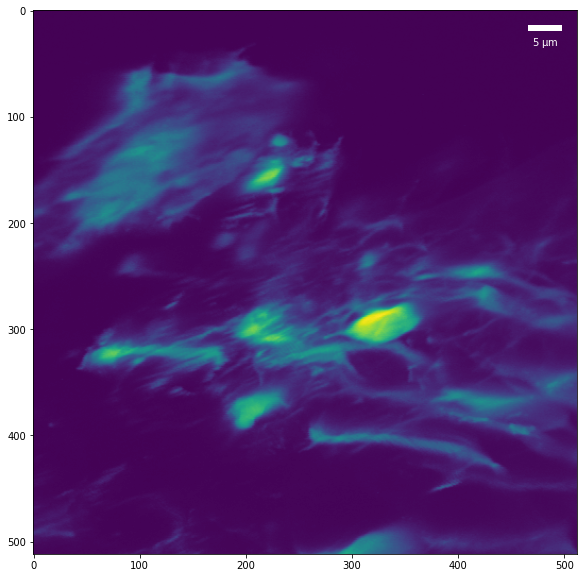

In [57]:
scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=.1,
    scale_loc="bottom",
    border_pad=1,
    pad=.5,
    color='white'
)
fig, ax = plt.subplots()

ax.add_artist(scalebar)
ax.imshow(np.std(corrected_image, axis=0))
plt.show()

In [62]:
ch1= np.zeros((int(image.shape[0]/2),512,512))
ch1_count=0
ch2= np.zeros((int(image.shape[0]/2),512,512))
ch2_count=0

for i in range(image.shape[0]):
    if i%2 == 0:
        ch1[ch1_count, :, :] = image[i, :, :]
        ch1_count+=1
    else:
        ch2[ch2_count, :, :] = image[i, :, :]
        ch2_count+=1
    

In [67]:
ch1 = returnOffsetCorr(ch1)
ch2 = returnOffsetCorr(ch2)

In [68]:
test = napari.Viewer()
test.add_image(ch1, name='Ch1', scale=(2.5, 1, 1), colormap='red', blending='additive')
test.add_image(ch2, name='Ch2', scale=(2.5, 1, 1), colormap='green', blending='additive')

<Image layer 'Ch2' at 0x7f15a99e4f98>

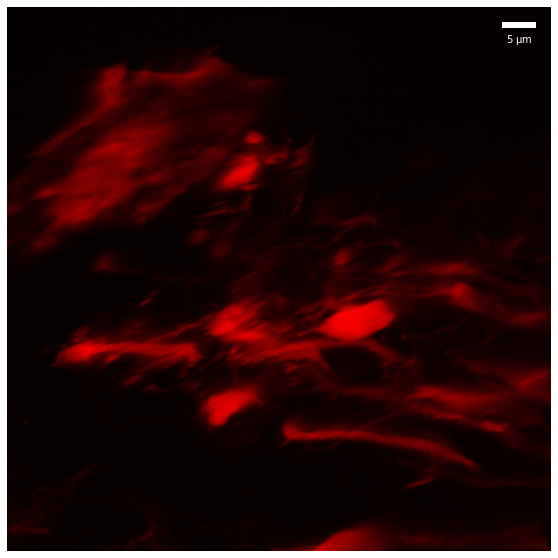

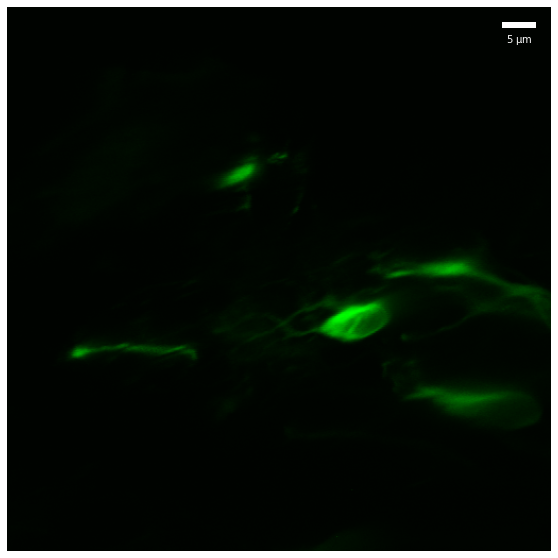

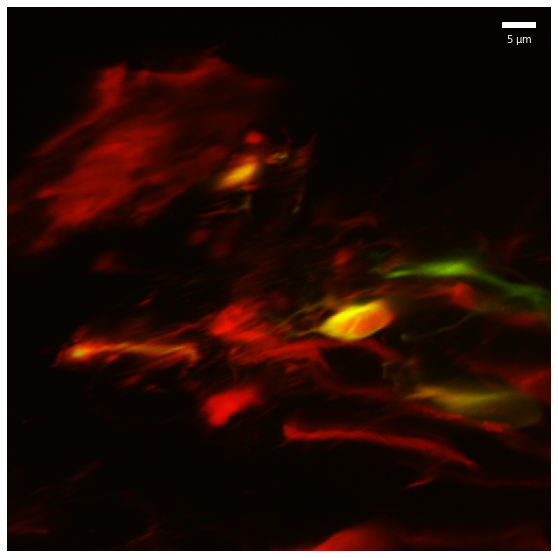

In [71]:
RGB_CH1 = np.zeros((ch1.shape[1], ch1.shape[2],3))
RGB_CH1[ : , :, 0 ] =  np.std(ch1, axis=0)/np.max(np.std(ch1, axis=0))
scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=0.1,
    scale_loc="bottom",
    border_pad=1,
    color='white',
    pad=.5
)
fig, ax = plt.subplots()

ax.add_artist(scalebar)
ax.imshow(RGB_CH1)
plt.axis('off')
plt.savefig(PATH+"CH1")
plt.show()

RGB_CH2 = np.zeros((ch2.shape[1], ch2.shape[2],3))
RGB_CH2[ : , :, 1 ] =  np.std(ch2, axis=0)/np.max(np.std(ch2, axis=0))
scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=0.1,
    scale_loc="bottom",
    color='white',
    border_pad=1,
    pad=.5
)
fig, ax = plt.subplots()
ax.add_artist(scalebar)
ax.imshow(RGB_CH2)
plt.axis('off')
plt.savefig(PATH+"CH2")

plt.show()

RGB_MERGE = np.zeros((ch1.shape[1], ch1.shape[2],3))
RGB_MERGE[ : , :, 0 ] =  np.std(ch1, axis=0)/np.max(np.std(ch1, axis=0))
RGB_MERGE[ : , :, 1 ] =  np.std(ch2, axis=0)/np.max(np.std(ch2, axis=0))
scalebar = sb.ScaleBar(
    PX,
    "um",
    box_color =None,
    box_alpha=0,
    length_fraction=0.1,
    scale_loc="bottom",
    color='white',
    border_pad=1,
    pad=.5
)
fig, ax = plt.subplots()
ax.add_artist(scalebar)
ax.imshow(RGB_MERGE)
plt.savefig(PATH+"MERGE")

plt.axis('off')
plt.show()